# CardioNet – Intelligent system for heart disease detection
real-world healthcare dataset with multiple demographic and medical features. The objective is to classify whether a patient is at high risk of developing a particular disease (e.g., diabetes, heart disease, or stroke). This binary/multi-class classification task involves full ML pipeline implementation—from data loading to model deployment readiness.


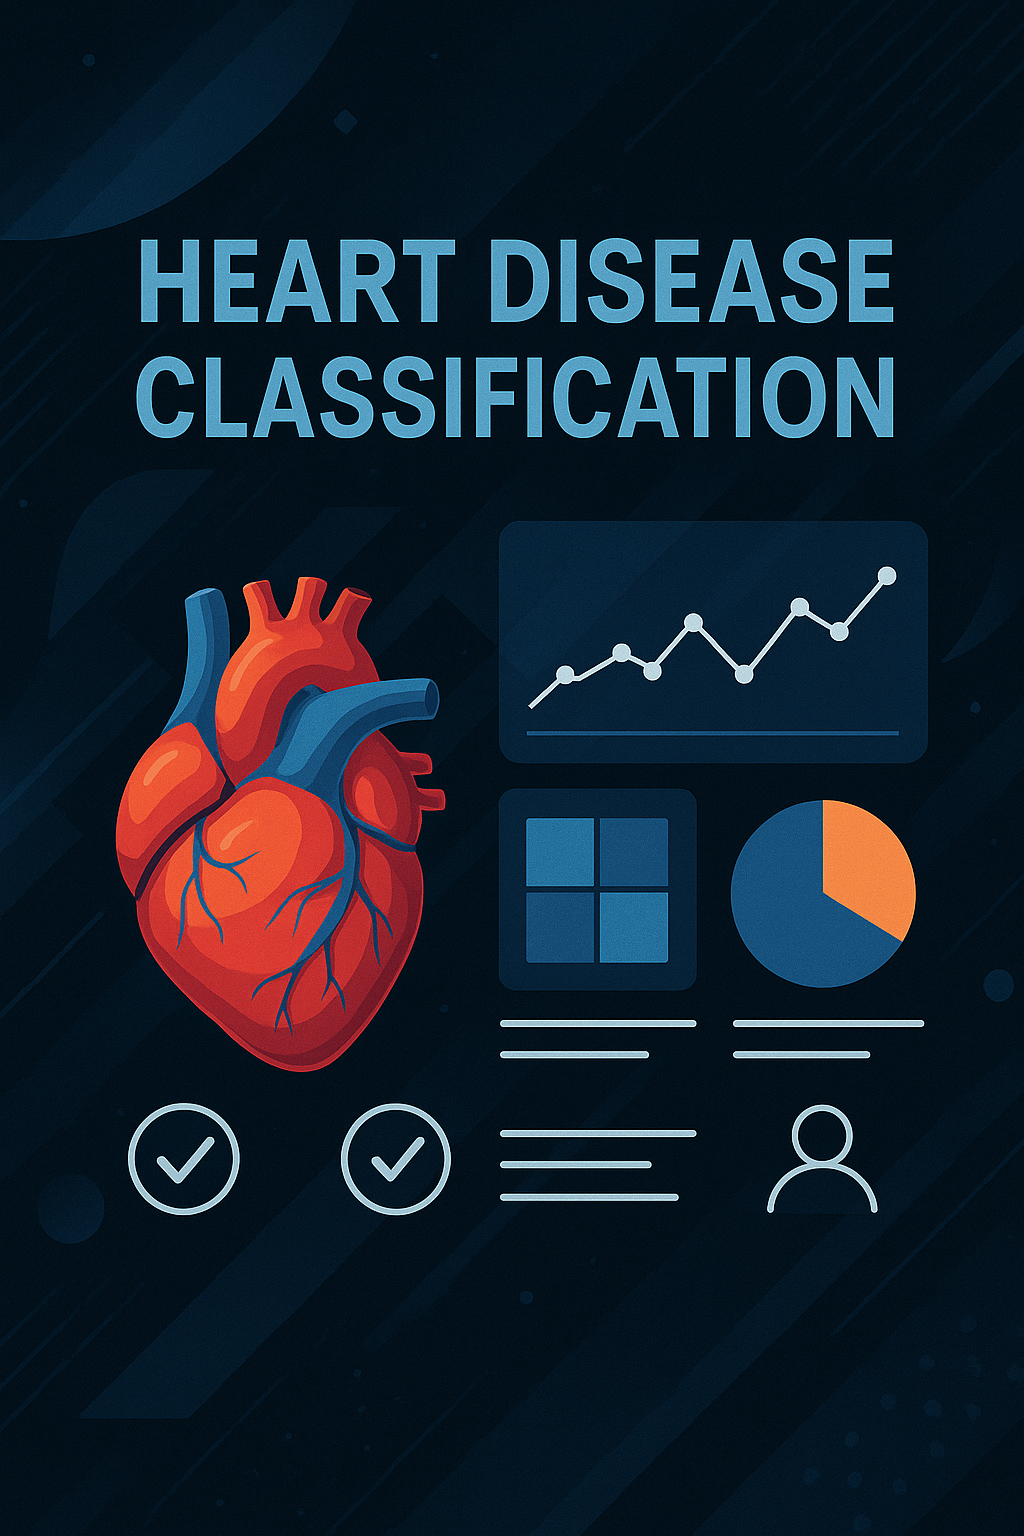

In [ ]:
from IPython.display import Image, display
display(Image(filename='heart.png')) 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Classifiers

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [ ]:
# Load Dataset
df = pd.read_csv("heart.csv")



NameError: name 'pd' is not defined

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Exploratory Data Analysis

In [ ]:
print("\n--- Dataset Shape ---\n", df.shape)
print("\n--- Dataset Info ---")
df.info()
print("\n--- Null Values ---\n", df.isnull().sum())
print("\n--- Summary Statistics ---\n", df.describe())


NameError: name 'df' is not defined

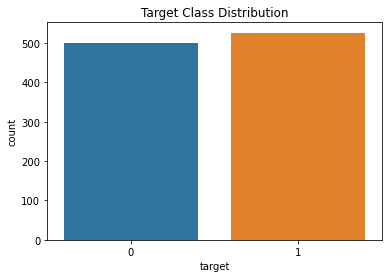

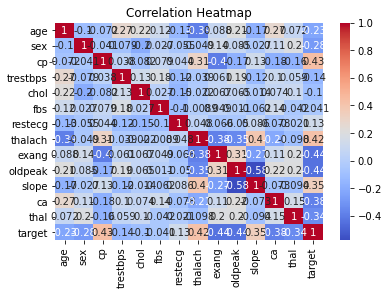

In [ ]:
# Visualizations
sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


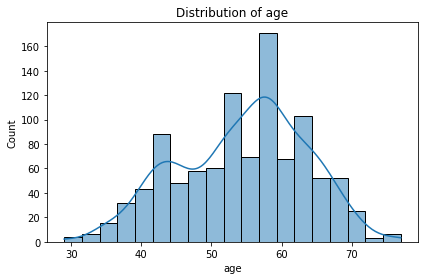

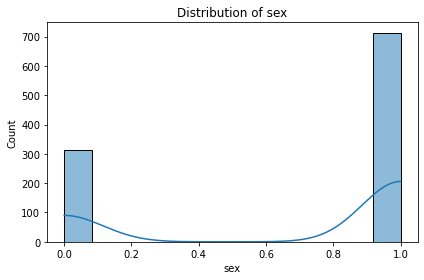

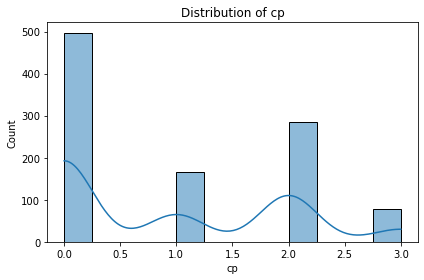

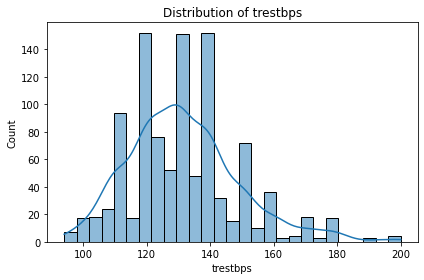

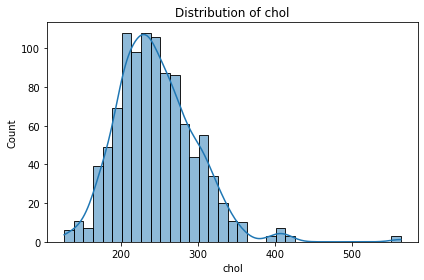

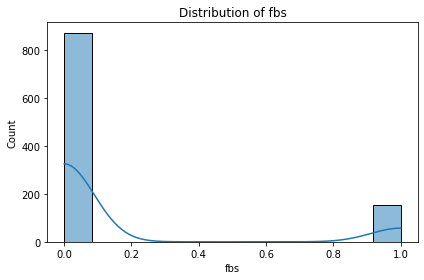

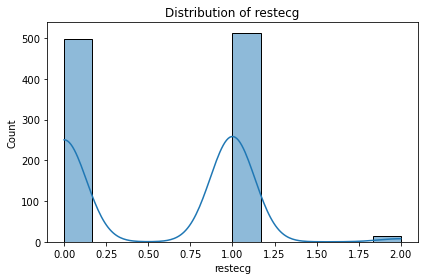

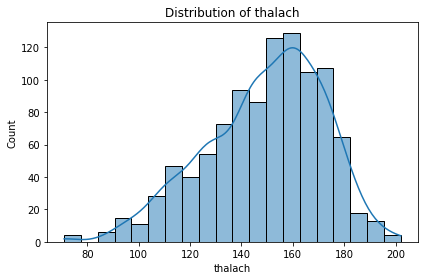

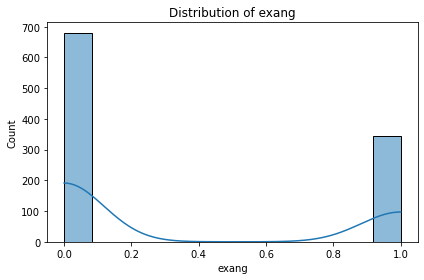

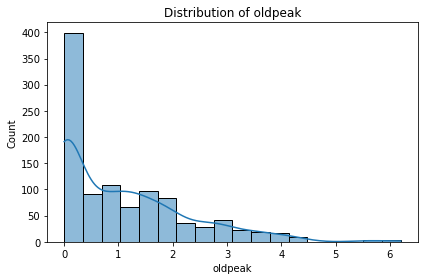

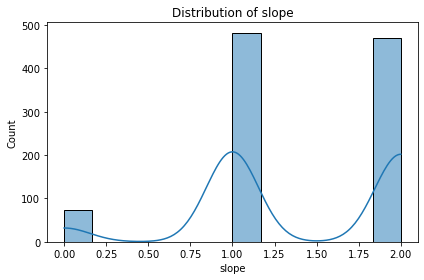

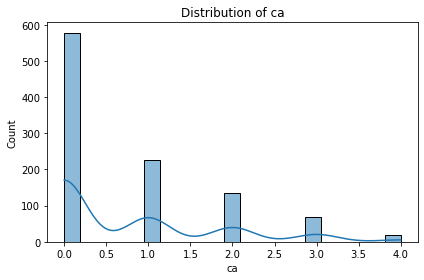

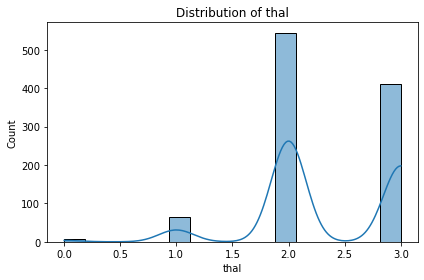

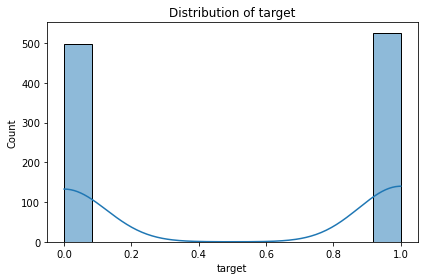

In [ ]:
# Histograms
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


In [ ]:
# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_base = df_imputed.drop('target', axis=1)
X_poly = poly.fit_transform(X_base)
try:
    feature_names = poly.get_feature_names_out(X_base.columns)
except AttributeError:
    feature_names = poly.get_feature_names(X_base.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
X_poly_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,oldpeak^2,oldpeak slope,oldpeak ca,oldpeak thal,slope^2,slope ca,slope thal,ca^2,ca thal,thal^2
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,...,1.00,2.0,2.0,3.0,4.0,4.0,6.0,4.0,6.0,9.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,...,9.61,0.0,0.0,9.3,0.0,0.0,0.0,0.0,0.0,9.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,...,6.76,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0,9.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,...,0.00,0.0,0.0,0.0,4.0,2.0,6.0,1.0,3.0,9.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,...,3.61,1.9,5.7,3.8,1.0,3.0,2.0,9.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,...,0.00,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,...,7.84,2.8,2.8,8.4,1.0,1.0,3.0,1.0,3.0,9.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,...,1.00,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,...,0.00,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0


In [ ]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_poly_df, df_imputed['target'])
selected_features = X_poly_df.columns[selector.get_support()]
X_final = pd.DataFrame(X_selected, columns=selected_features)
y = df_imputed['target']


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.90957214, -0.71813066,  0.69652503, ..., -0.51280968,
        -0.68229418,  0.35159863],
       [-0.90957214,  1.39250426,  2.47581015, ...,  3.2695509 ,
         1.69174215,  2.88524899],
       [ 1.04803719, -0.71813066, -0.57439291, ..., -0.51280968,
        -0.68229418, -0.45175393],
       ...,
       [-0.90957214, -0.71813066,  4.33982313, ..., -0.51280968,
        -0.68229418,  4.92452856],
       [-0.90957214,  1.39250426,  0.78125289, ...,  1.37837061,
         1.69174215,  1.03135848],
       [ 1.04803719,  1.39250426, -0.06602574, ...,  0.43278046,
         0.90039671, -0.20456853]])

In [ ]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "MLP": MLPClassifier(max_iter=500)
}

In [ ]:
# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

C:\Users\Memoona\AppData\Roaming\Python\Python38\site-packages\xgboost\core.py:158: UserWarning: [19:38:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Memoona\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
2,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
9,Extra Trees,1.000000,1.000000,1.000000,1.000000,1.000000
1,Decision Tree,0.985366,1.000000,0.971429,0.985507,0.985571
6,XGBoost,0.980488,0.990291,0.971429,0.980769,0.999714
7,Gradient Boosting,0.892683,0.873874,0.923810,0.898148,0.974286
10,MLP,0.848780,0.842593,0.866667,0.854460,0.949238
4,SVM,0.804878,0.764228,0.895238,0.824561,0.842476
3,KNN,0.819512,0.833333,0.809524,0.821256,0.943714
0,Logistic Regression,0.790244,0.758333,0.866667,0.808889,0.866857
8,AdaBoost,0.775610,0.792079,0.761905,0.776699,0.892143


# Evaluation metrices for Classification 

## how to choose right evaluation metric?

Choosing the right evaluation metric is critically important in classification (and all machine learning tasks) because different metrics tell different stories, and picking the wrong one can lead to false confidence or bad decisions.

## 1. Accuracy can be misleading in imbalanced datasets 

Imagine you're predicting cancer (1%) vs. healthy (99%) patients.

If your model predicts “healthy” for everyone, accuracy = 99% 🤯

But it's useless because you're missing all cancer cases.

👉 In this case, metrics like:

Recall (Sensitivity): How many actual cancer cases were caught?

Precision: How many predicted cancer cases were correct?

F1-score: Balance between precision and recall
are much better choices than accuracy.



Using only accuracy might hide the fact that:

Model performs well on training data but not on test data

Model is guessing blindly on one class

Metrics like confusion matrix, precision/recall curves, and cross-validation scores reveal more nuanced problems.

In healthcare, a false negative (missed diagnosis) is much worse than a false positive (extra test).
In spam filtering, a false positive (missing a real email) is worse than letting some spam through.

👉 You must align your metric with the domain risk/co